# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [125]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last: Zhang, First: Linying]

### Part (b): Course Number

[AC 209a]

### Part (c): Who did you work with?

[Yi Ding, Xinrui Cao]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

In [126]:
#Load the data
data = np.loadtxt('dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543, 64)
response array shape: (543,)


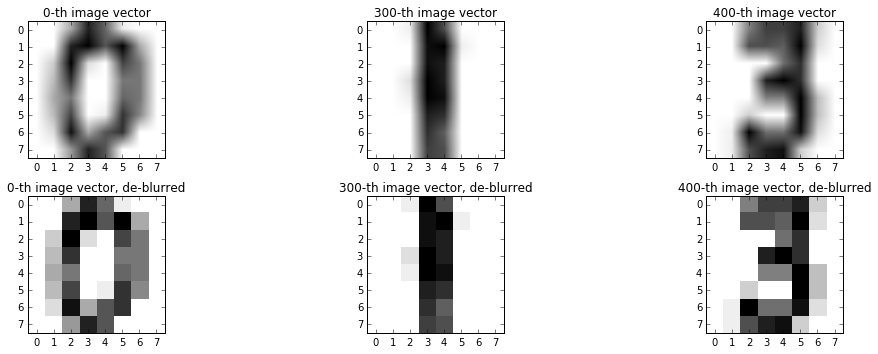

In [127]:
#Plot a couple of images from the dataset
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('0-th image vector')
ax[0, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('300-th image vector')
ax[0, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('400-th image vector')

ax[1, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('0-th image vector, de-blurred')
ax[1, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('300-th image vector, de-blurred')
ax[1, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('400-th image vector, de-blurred')

plt.tight_layout()
plt.show()

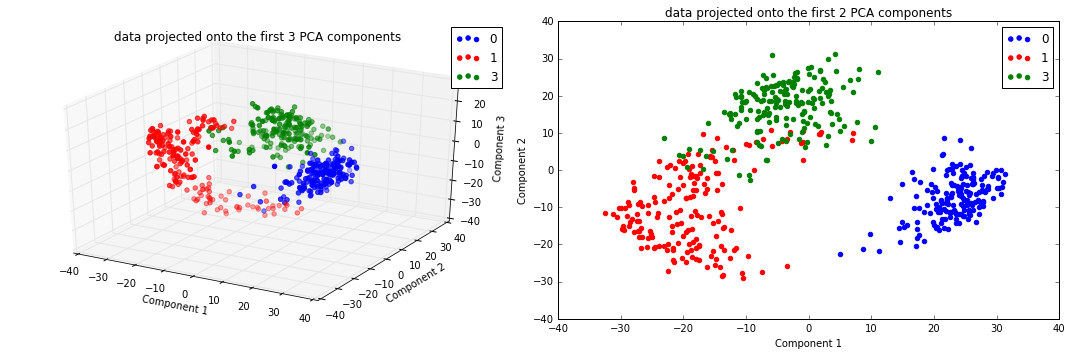

In [128]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

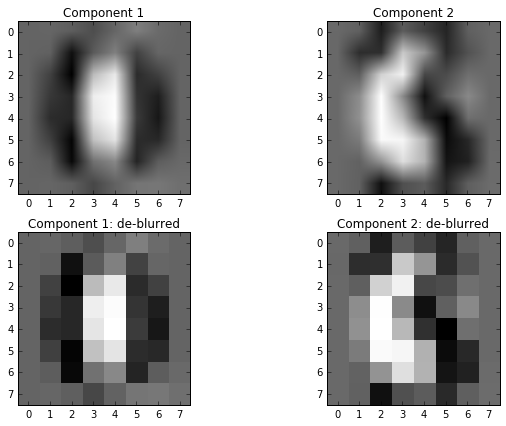

In [129]:
#Display the principal components of PCA as digital images
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('Component 1')

# COMPONENT 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('Component 2')

# COMPONENT 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [130]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg()
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg()
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1) # Returns the indices of the maximum values along an axis.

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


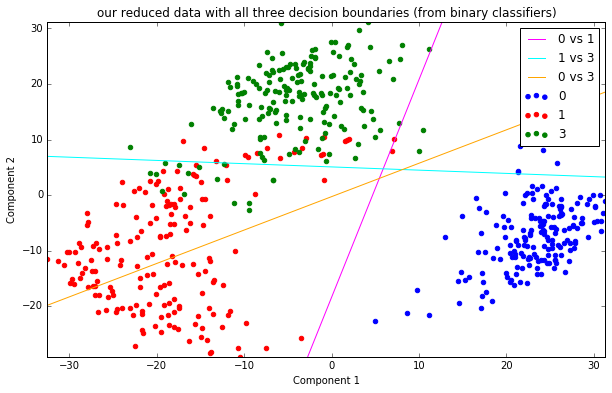

In [131]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='b', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='r', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

In [132]:
############### DATA COLLECTION AND CLEANING ###############
#Load the data
data = pd.read_csv('dataset_2.txt', delimiter=',')

# separate predictor (text) and response(sentiment) variable
x = data['text']
y = data['class']

#Change sentiment response to 0 and 1
y[y=='Neg']=0
y[y=='Pos']=1
#Change the data type from object to integer 
y=y.astype(int)

#Tokenizing and filtering words
vec = CountVectorizer(stop_words="english", min_df=0.01, max_df=0.50, lowercase = True)
x_counts = vec.fit_transform(x).toarray()
x_counts = pd.DataFrame(x_counts)
# Concatenate the response variable(0/1) and vectorized x to a new dataframe
frames = [y, x_counts]
df = pd.concat(frames, axis = 1)

/Users/Linying/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


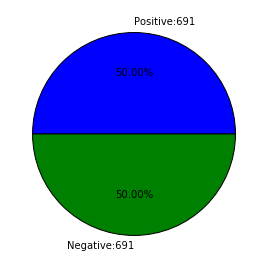

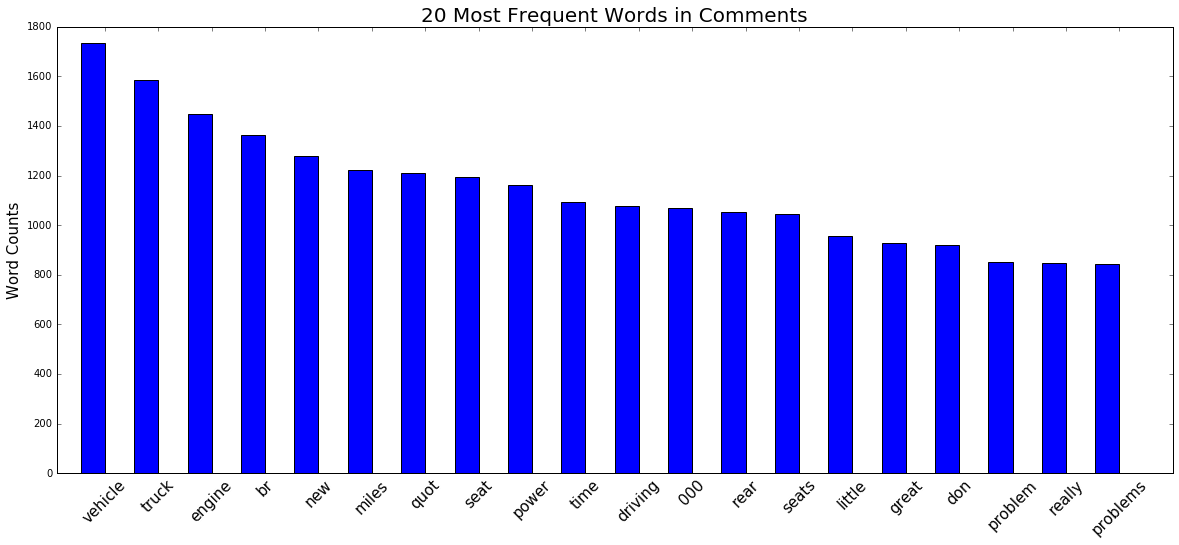

In [133]:
############### DATA EXPLORATION ###############
## 1. Pie chart to show the distribution of positive and negative comments
pos = y.sum()
neg = len(y) - pos

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.pie([pos, neg], 
        labels = ['Positive:' + str(pos), 'Negative:' + str(neg)],
        autopct ='%.2f%%')


## 2. barplot the 20 most frequent words
# Count the number of times each word appeared
word_counts = x_counts.sum(axis = 0)
#Get the list of words
word_names = vec.get_feature_names()
#Concatenate words and counts into one dataframe
d = {'word': word_names, 'count': word_counts}
word_table = pd.DataFrame(data = d)
sorted_table = word_table.sort('count', ascending = False)


#Create bar plot of the 20 most frequently appeared words in our filtered list
#Get the first 20 words and counts
sorted_counts = sorted_table['count'].values
sorted_words = sorted_table['word'].values

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

N = 20
ind = np.arange(N) # the x locations for the groups

width = 0.45                      # the width of the bars

## the bars
ax.bar(ind, sorted_counts[:20], width)

# axes and labels
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0, 1800)
ax.set_ylabel('Word Counts', fontsize= 15)
ax.set_title('20 Most Frequent Words in Comments', fontsize = 20)
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(sorted_words[:20])
plt.setp(xtickNames, rotation=45, fontsize=15)

plt.show()

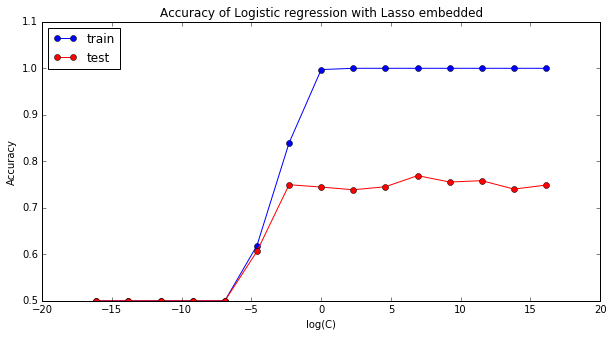

In [134]:
############### MODELING AND ANALYSIS ###############
#Create empty arrays to store accuracy of train, test, and average accuracy from CV
accuracy_train = np.zeros([15,5])
accuracy_test = np.zeros([15,5])
average_accuracy = np.zeros([15,2])

# Set up cross-validation
kf = KFold(y.shape[0], 5, shuffle=True) 
j=0 #index the jth fold

#Set range of penalty parameter lambda
lambda_min = -7
lambda_max = 7

num_lambdas = 15
lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

for train_idx, test_idx in kf:
    
    # get training and testing sets 
    y_train, x_train = y.ix[train_idx, ], x_counts.ix[train_idx, ]
    y_test , x_test  = y.ix[test_idx, ], x_counts.ix[test_idx, ]
    
     # Fit logistic regression with varying lambda (lasso penalty) on train set
    for i in range(-7, 8):
        reg=LogReg(C=10**i, penalty='l1')
        reg.fit(x_train, y_train)
        accuracy_train[i+7,j] = reg.score(x_train, y_train)
        accuracy_test[i+7,j] = reg.score(x_test, y_test)
    
    # calculate r-squared mean across five fold for each lambda
    for i in range(-7, 8):
        average_accuracy[i+7,0]=accuracy_train[i+7,:].mean()
        average_accuracy[i+7,1]=accuracy_test[i+7,:].mean()
    
    j=j+1 

# plot accuracy of training and testing dataset against parameter lambda
plt.figure(figsize=(10,5))
h = np.log(10**lambdas)
plt.plot(h, average_accuracy[:, 0], 'bo-', label = 'train')
plt.plot(h, average_accuracy[:, 1], 'ro-', label = 'test')
plt.title('Accuracy of Logistic regression with Lasso embedded');plt.xlabel('log(C)');plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [216]:
# Set up cross-validation
kf = KFold(y.shape[0], 5, shuffle=True) 
j=0 #index the jth fold

for train_idx, test_idx in kf:
    
    # get training and testing sets 
    y_train, x_train = y.ix[train_idx, ], x_counts.ix[train_idx, ]
    y_test , x_test  = y.ix[test_idx, ], x_counts.ix[test_idx, ]
    
     # Fit logistic regression with varying lambda (lasso penalty) on train set
    for i in range(-7, 8):
        reg=LogReg(C=1, penalty='l1')
        reg.fit(x_train, y_train)
        accuracy_train[i+7,j] = reg.score(x_train, y_train)
        accuracy_test[i+7,j] = reg.score(x_test, y_test)
    
    # calculate r-squared mean across five fold for each lambda
    for i in range(-7, 8):
        
        average_accuracy[i+7,0]=accuracy_train[i+7,:].mean()
        average_accuracy[i+7,1]=accuracy_test[i+7,:].mean()
    
    j=j+1 

# Find out how many words we use in our model

counter = 0
ind = []
for i in coeff:
    if abs(i)>0:
        ind.append(counter)
    counter +=1
print "Number of words used in model: ", len(ind)


Number of words used in model:  453


## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.

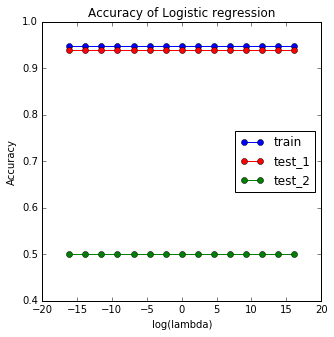

The accuracy on training dataset is  0.948717948718
The accuracy on testing dataset 1 is  0.940298507463
The accuracy on testing dataset 2 is  0.5


In [137]:
# Load the data
train = pd.read_csv('dataset_3_train.txt', header = None)
test_1 = pd.read_csv('dataset_3_test_1.txt', header = None)
test_2 = pd.read_csv('dataset_3_test_2.txt', header = None)

# Separate response variable and predictions
x_train = train.iloc[:, :5]
y_train = train.iloc[:, -1]
x_test_1 = test_1.iloc[:, :5]
x_test_2 = test_2.iloc[:, :5]
y_test_1 = test_1.iloc[:, -1]
y_test_2 = test_2.iloc[:, -1]

# Run for different values of lambda 
lambda_min = -7
lambda_max = 7

num_lambdas = 15
num_predictors = x_train.shape[1]

lambdas= np.linspace(lambda_min, lambda_max, num_lambdas)

train_accuracy = np.zeros(num_lambdas)
test_1_accuracy = np.zeros(num_lambdas)
test_2_accuracy = np.zeros(num_lambdas)

for ind, i in enumerate(lambdas):    
    # Fit logistic regression on train set
    reg = LogReg(C = 10**i)
    reg.fit(x_train, y_train)
       
    # Evaluate train & test performance
    train_accuracy[ind] = reg.score(x_train, y_train)
    test_1_accuracy[ind] = reg.score(x_test_1, y_test_1)
    test_2_accuracy[ind] = reg.score(x_test_2, y_test_2)

# plot accuracy of training and testing dataset against parameter lambda
plt.figure(figsize=(5,5))
h = np.log(10**lambdas)
plt.plot(h, train_accuracy, 'bo-', label = 'train')
plt.plot(h, test_1_accuracy, 'ro-', label = 'test_1')
plt.plot(h, test_2_accuracy, 'go-', label = 'test_2')
plt.title('Accuracy of Logistic regression');plt.xlabel('log(lambda)');plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

print "The accuracy on training dataset is ", train_accuracy[14]
print "The accuracy on testing dataset 1 is ", test_1_accuracy[14]
print "The accuracy on testing dataset 2 is ", test_2_accuracy[14]

In [138]:
# Run logistic regression on training dataset
reg = LogReg()
reg.fit(x_train, y_train)

# extract predicted probability from logistic regression for both datasets
p_hat_1 = reg.predict_proba(x_test_1)
p_hat_2 = reg.predict_proba(x_test_2)

# Classify y=0 vs y=1 based on 0.5 cutoff
n1 = test_1.shape[0]
n2 = test_2.shape[0]
predC1_1 = np.zeros(n1)
predC1_2 = np.zeros(n2)
predC1_1[p_hat_1[:,1]>=0.5]=1
predC1_2[p_hat_2[:,1]>=0.5]=1

# Classify y=0 vs y=1 based on 0.05 cutoff
n1 = test_1.shape[0]
n2 = test_2.shape[0]
pred1 = np.zeros(n1)
pred2 = np.zeros(n2)
pred1[p_hat_1[:,1]>=0.05]=1
pred2[p_hat_2[:,1]>=0.05]=1

accuracy_test_1 = np.mean(pred1==y_test_1)
accuracy_test_2 = np.mean(pred2==y_test_2)
print "The accuracy of prediction on test 1 (C2): ", accuracy_test_1
print "The accuracy of prediction on test 2 (C2): ", accuracy_test_2
print "The accuracy of prediction on test 1 (C1): ", test_1_accuracy[14]
print "The accuracy of prediction on test 1 (C1): ", test_2_accuracy[14]
print "----------------------------------"
print "The sensitivity of model C2 on testset 1: ", np.mean(pred1[np.array(y_test_1) == 1] == 1)
print "The specificity of model C2 on testset 1: ", np.mean(pred1[np.array(y_test_1) == 0] == 0)
print "The sensitivity of model C2 on testset 2: ", np.mean(pred2[np.array(y_test_2) == 1] == 1)
print "The specificity of model C2 on testset 2: ", np.mean(pred2[np.array(y_test_2) == 0] == 0)
print "----------------------------------"
print "The sensitivity of model C1 on testset 1: ", np.mean(predC1_1[np.array(y_test_1) == 1] == 1)
print "The specificity of model C1 on testset 1: ", np.mean(predC1_1[np.array(y_test_1) == 0] == 0)
print "The sensitivity of model C1 on testset 2: ", np.mean(predC1_2[np.array(y_test_2) == 1] == 1)
print "The specificity of model C1 on testset 2: ", np.mean(predC1_2[np.array(y_test_2) == 0] == 0)

The accuracy of prediction on test 1 (C2):  0.582089552239
The accuracy of prediction on test 2 (C2):  0.553191489362
The accuracy of prediction on test 1 (C1):  0.940298507463
The accuracy of prediction on test 1 (C1):  0.5
----------------------------------
The sensitivity of model C2 on testset 1:  0.25
The specificity of model C2 on testset 1:  0.603174603175
The sensitivity of model C2 on testset 2:  0.531914893617
The specificity of model C2 on testset 2:  0.574468085106
----------------------------------
The sensitivity of model C1 on testset 1:  0.0
The specificity of model C1 on testset 1:  1.0
The sensitivity of model C1 on testset 2:  0.0
The specificity of model C1 on testset 2:  1.0


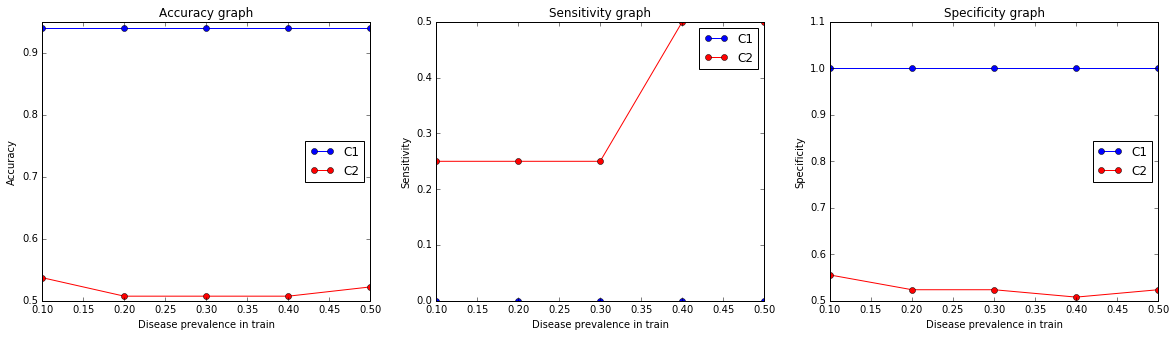

In [215]:
# New training set (combine original train with test set 2)
data = pd.concat([train, test_2])
data_control = new_train[new_train.iloc[:, 5] ==0]
data_patient = new_train[new_train.iloc[:, 5] ==1]

# Perform both C1 and C2 on training set with different disease prevalance
accuracy_C1 = []
accuracy_C2 = []
sensitivity_C1 = []
sensitivity_C2 = []
specificity_C1 = []
specificity_C2 = []

for i in [1,2,3,4,5]:
    # vary number of patients in sub training set
    patients = data_patient.iloc[:i*10, :]
    sub_train = pd.concat([patients, data_control])
    x_train = sub_train.iloc[:, :5]
    y_train = sub_train.iloc[:, -1]
    
    # Implement Logistic regression
    reg = LogReg()
    reg.fit(x_train, y_train)
    p_hat = reg.predict_proba(x_test_1)
    
    # Model C1: Classify y=0 vs y=1 based on 0.5 cutoff
    n1 = test_1.shape[0]
    predC1 = np.zeros(n1)
    predC1[p_hat[:,1]>=0.5]=1
    
    # Model C2: Classify y=0 vs y=1 based on 0.05 cutoff
    n = sub_train.shape[0]
    prevalance = float(i*10)/n
    n1 = test_1.shape[0]
    predC2 = np.zeros(n1)
    predC2[p_hat[:,1]>=prevalance]=1

    # Store the measures in lists
    accuracy_C1.append(np.mean(predC1==y_test_1))
    accuracy_C2.append(np.mean(predC2==y_test_1))

    sensitivity_C1.append(np.mean(predC1[np.array(y_test_1) == 1] == 1))
    sensitivity_C2.append(np.mean(predC2[np.array(y_test_1) == 1] == 1))
    
    specificity_C1.append(np.mean(predC1[np.array(y_test_1) == 0] == 0))
    specificity_C2.append(np.mean(predC2[np.array(y_test_1) == 0] == 0))

    
# Plot each measure against the disease prevalence 
prevalence = [0.1, 0.2, 0.3, 0.4, 0.5]
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(20, 5))

ax2.plot(prevalence, accuracy_C1, 'bo-', label = 'C1')
ax2.plot(prevalence, accuracy_C2, 'ro-', label = 'C2')
ax2.set_title('Accuracy graph')
ax2.set_xlabel('Disease prevalence in train')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')

ax3.plot(prevalence, sensitivity_C1, 'bo-', label = 'C1')
ax3.plot(prevalence, sensitivity_C2, 'ro-', label = 'C2')
ax3.set_title('Sensitivity graph')
ax3.set_xlabel('Disease prevalence in train')
ax3.set_ylabel('Sensitivity')
ax3.legend(loc='best')

ax4.plot(prevalence, specificity_C1, 'bo-', label = 'C1')
ax4.plot(prevalence, specificity_C2, 'ro-', label = 'C2')
ax4.set_title('Specificity graph')
ax4.set_xlabel('Disease prevalence in train')
ax4.set_ylabel('Specificity')
ax4.legend(loc='best')